# 1. Project Description

You work at the online store "Ice" which sells video games from all over the world. Data related to user and expert game reviews, genre, platform (e.g., Xbox or PlayStation), and historical game sales data are available from open sources. You need to identify patterns that determine whether a game can be said to be successful or not. That way, you can find the games with the most potential and plan their advertising campaigns.

In front of you is data from 2016. Try to imagine that now it is December 2016 and you are planning a campaign for 2017.
(The most important thing is to gain experience in working with data. It doesn't matter whether you forecast 2017 sales based on data from 2016 or forecast 2027 sales based on data from 2026.).

This dataset contains the abbreviation ESRB. ESRB is an abbreviation for Entertainment Software Rating Board, which is an independent regulatory organization that evaluates game content and assigns age ratings such as Teen or Mature.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Step 1 :Data File



   1. Rename the column (use all lowercase letters).
   2. Convert the data to the required data type.
   3. Describe the columns whose data types you changed and explain why.
     

In [11]:
df = pd.read_csv('games.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Step 2. Data Preparation
### Change column name become lower case

In [14]:
df.rename(columns={'Name':'name'}, inplace=True)

In [15]:
df.rename(columns={'Platform':'platform'}, inplace=True)

In [16]:
df.rename(columns={'Year_of_Release':'year_of_release'}, inplace=True)

In [17]:
df.rename(columns={'Genre':'genre'}, inplace=True)

In [18]:
df.rename(columns={'NA_sales':'na_sales'}, inplace=True)

In [19]:
df.rename(columns={'EU_sales':'eu_sales'}, inplace=True)

In [20]:
df.rename(columns={'JP_sales':'jp_sales'}, inplace=True)

In [21]:
df.rename(columns={'Other_sales':'other_sales'}, inplace=True)

In [22]:
df.rename(columns={'Critic_Score':'critic_score'}, inplace=True)

In [23]:
df.rename(columns={'User_Score':'user_score'}, inplace=True)

In [24]:
df.rename(columns={'Rating':'rating'}, inplace=True)

In [25]:
df.columns=df.columns.str.lower()

In [26]:
df.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [27]:
df.shape

(16715, 11)

In [28]:
#df[['na_sales','eu_sales','jp_sales','other_sales']].round(2)

In [29]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [30]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

It was found that several columns had missing values ​​(NAN). and will be cleaned one by one.

</div>


## Step 2A Missing Value

In [31]:

df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [32]:
# Fill missing on Year of release dengan median
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())

In [33]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [34]:
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [35]:
df.loc[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [36]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [37]:
df = df.dropna(subset=['name'])

In [38]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [39]:
df.loc[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [40]:
df.loc[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [41]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [42]:
df.loc[df['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [43]:
df.loc[df['user_score'] == 'NaN', 'user_score'] = np.nan

In [44]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [45]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The value of Nan has been changed. for Rating, User_score, Critic_score have been changed to 'unknown', for year of lease it has been changed to average year.
</div>



In [46]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [47]:
df.duplicated().sum()

0

In [48]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [49]:
df['platform'].value_counts()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [50]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [51]:
df['genre'].value_counts()

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [52]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [53]:
df['name'].value_counts()

name
Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11559, dtype: int64

In [54]:
df['critic_score'].isnull().sum()

8576

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

from Data above we find: 
    
    1. No data duplicate
    2. The most sold platform is PS2
    3. The most popular genre is Action

</div>




In [56]:
#df["critic_score"] = df["critic_score"].astype(int)
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce').astype('Int64')

In [57]:
df["year_of_release"] = df["year_of_release"].astype(int)

In [58]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [59]:
df['year_of_release'].value_counts()

year_of_release
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

 The year when most games were sold was 2007

</div>


    
## Menghitung Total_sales

In [60]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [61]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


In [62]:
df['critic_score'].value_counts()

critic_score
70    256
71    254
75    245
78    240
73    238
     ... 
20      3
21      1
17      1
22      1
13      1
Name: count, Length: 82, dtype: Int64

In [63]:
df['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

In [64]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [65]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

 The ratings issued by the ERSB Entertainment Software Rating Board are as follows:
    
    AO = Adult Only, Adult game, contains elements of violence
    E = Everyone, for all
    E10+ = for all and children from 10 years old
    K-A = Kids to adult, children approaching adulthood
    M = Mature, for 17 years and over
    RP = Rating Pending
    T = Teen, Teen

    

</div>

## Step 2B. Exploratory Data Analysis 

## The number of games released per year

Analyze the data

   1. See how many games were released in different years. Is the data in each period significant?
   
   
   2. See how sales vary from one platform to another. Choose the platform with the largest total sales and make the distribution based on annual data. Look for platforms that were once popular, but now don't have any sales.         How long does it usually take for new platforms to emerge and for old platforms to fade in popularity?
   
   
   3. Determine the time period for data collection. To do this, look at your answer in the previous question. The data you retrieve should allow you to build a model for 2017.
      Just work with the data that you think is relevant. Ignore data for previous years.
    
    4. Which platforms have the most sales? Which platforms are growing or shrinking? Choose several platforms that have the potential to generate profits.
   
   
   5. Create a boxplot for global sales of all games grouped by platform. Is the difference in sales significant? What about average sales on various platforms? Describe your discovery.
   
   
   6. See how user reviews and professionals influence sales on one of the popular platforms (of your choice). Create a scatter plot and calculate the correlation between reviews and sales. Then, draw conclusions.
   
   
   7. Keeping your conclusions in mind, compare the sales of the same game on other platforms.
   
   
   8. Observe the general distribution of games by genre. What can we conclude regarding the most profitable genres? Can you generalize regarding genres with high and low sales?

In [66]:
gpt=pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
gpt.sort_values(by=['name'], ascending=False )

,name
year_of_release,
2007,1466
2008,1427
2009,1426
2010,1255
2011,1136
2006,1006
2005,939
2002,829
2003,775


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The highest number of games released was in 2007 with 2466 games.

</div>

In [67]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

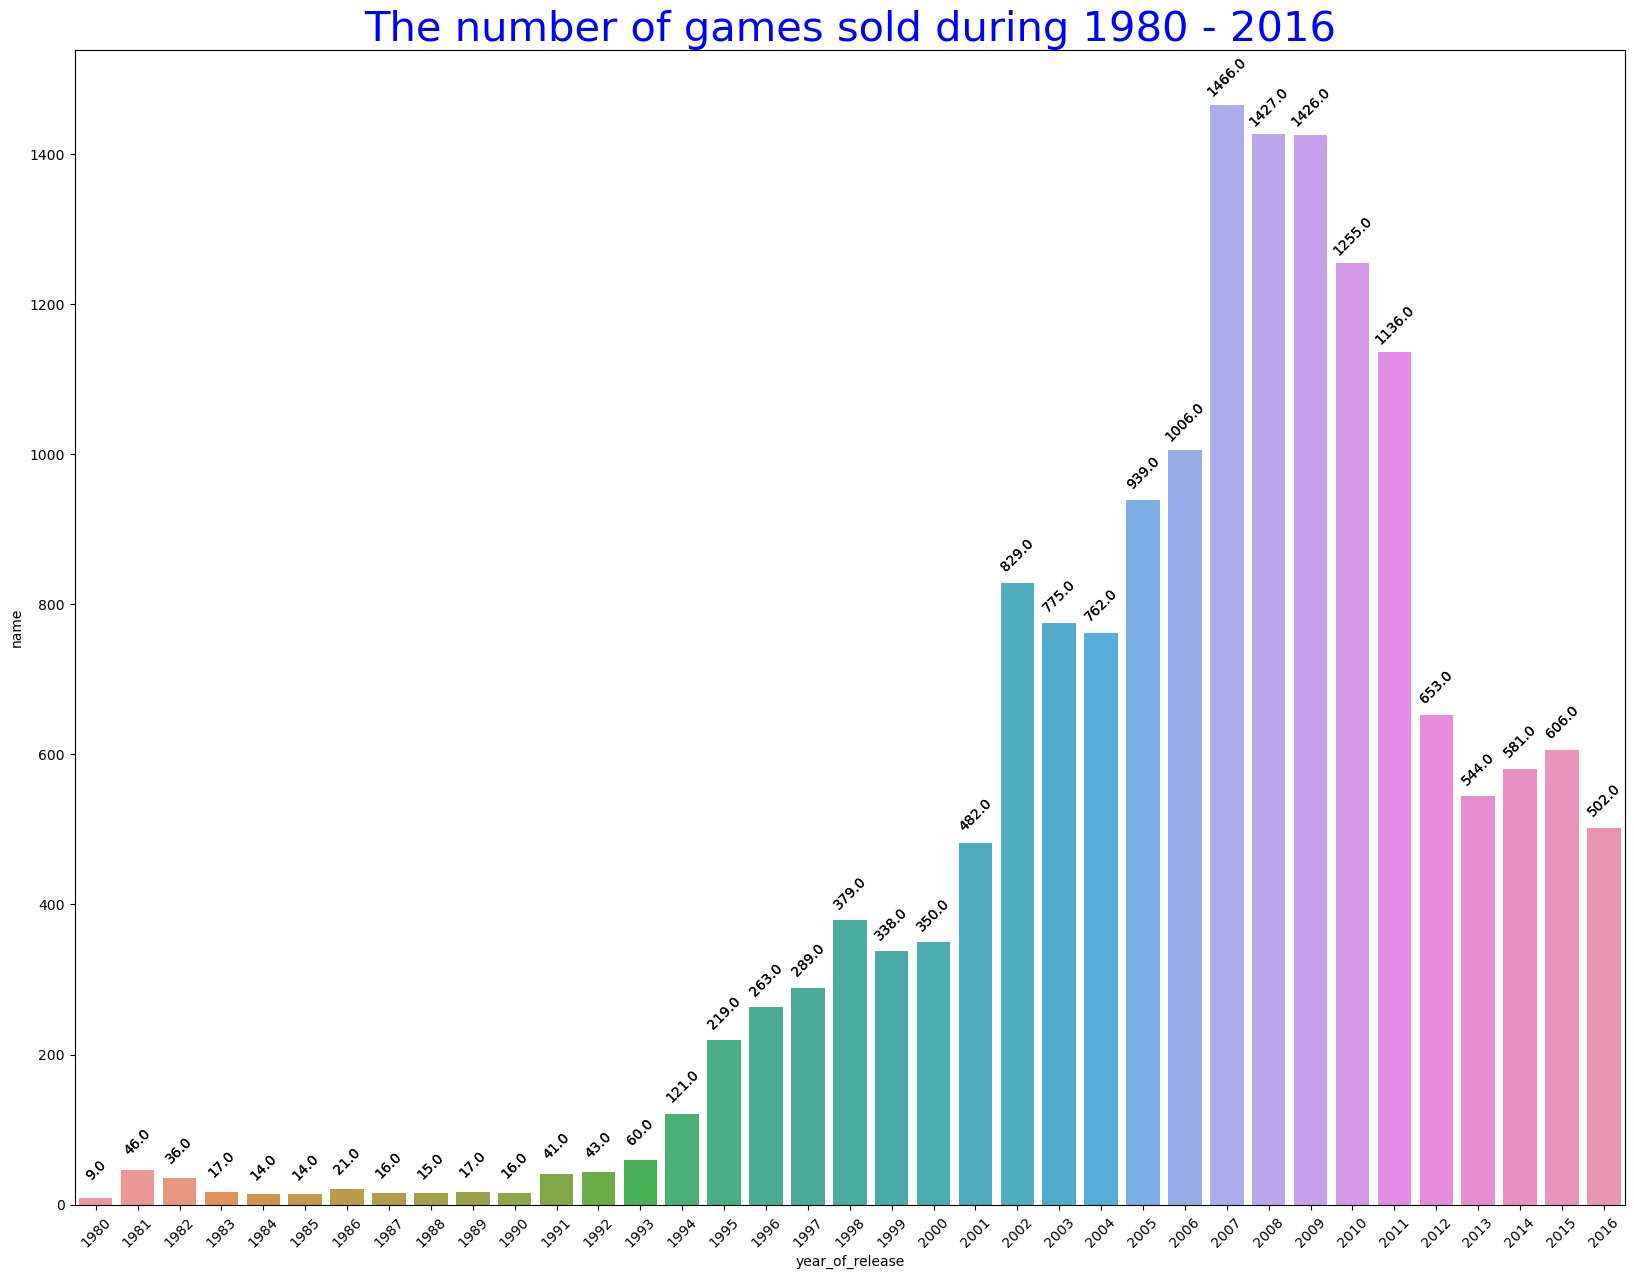

In [68]:
plt.figure(figsize=(20, 15))
dtg = df.groupby('year_of_release')['name'].count().reset_index()
plt.title('The number of games sold during 1980 - 2016', fontsize=30, color='blue')

splot = sns.barplot(data=dtg, x='year_of_release', y='name') # assign plot kedalam object
splot = sns.barplot(data=dtg, x='year_of_release', y='name') # assign plot kedalam object
#contoh kode anotasi mulai
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # posisi label value vertical dan horizontal berada pada certer plot
                   xytext = (0, 20), rotation=45, # memutar label value pada plot 45 derajat dan memberi jara 20 pixel dari plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The highest number of games released was in 2007 with 2466 games.

</div>


In [69]:
dg=pd.pivot_table(df, columns='platform', values='total_sales', aggfunc='sum')
dg

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
total_sales,96.98,0.1,259.0,15.95,806.12,255.46,317.85,198.93,28.35,0.04,...,33.59,1.86,200.04,0.16,1.42,907.51,82.19,971.42,257.74,159.32


In [70]:
dtg = df.groupby('platform')['total_sales'].sum().reset_index()
dtg

,platform,total_sales
0,2600,96.98
1,3DO,0.10
2,3DS,259.00
3,DC,15.95
4,DS,806.12
5,GB,255.46
6,GBA,317.85
7,GC,198.93
8,GEN,28.35
9,GG,0.04


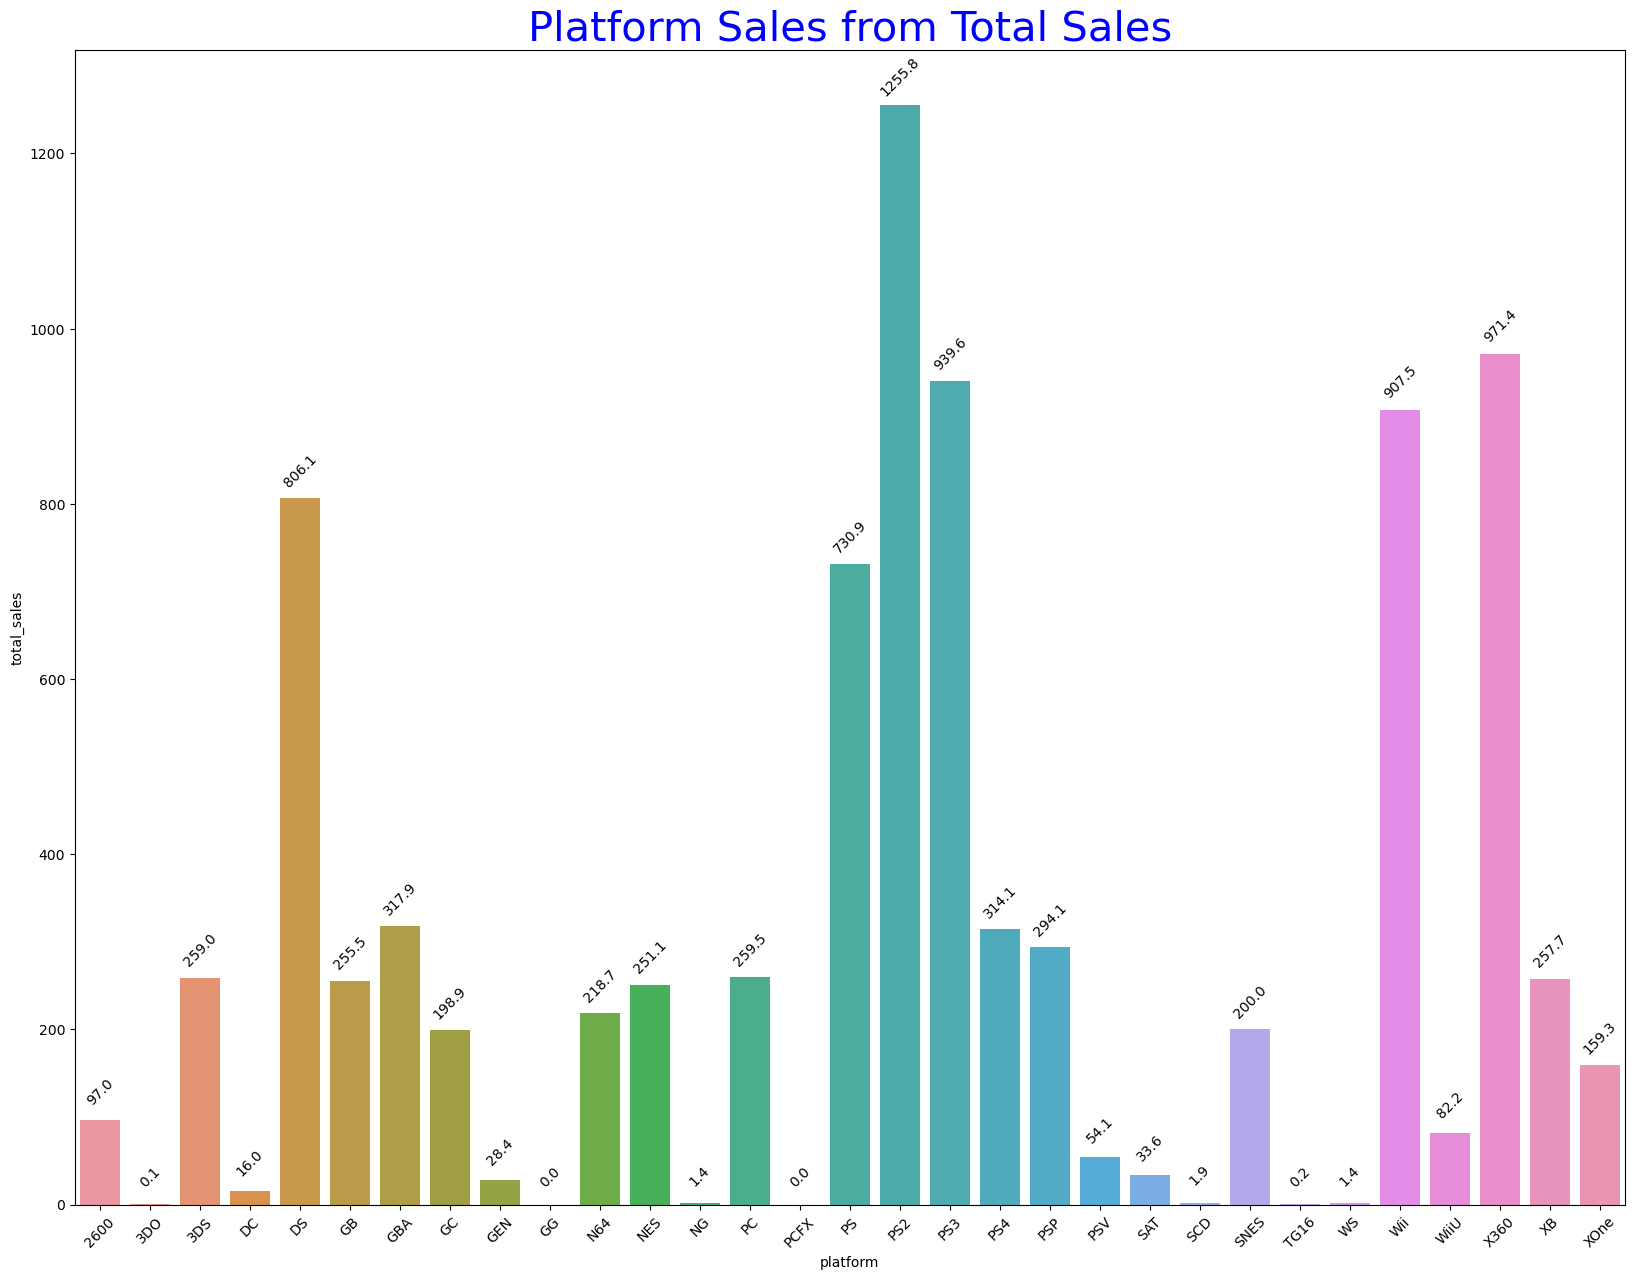

In [71]:
plt.figure(figsize=(20, 15))
dtg = df.groupby('platform')['total_sales'].sum().reset_index()
plt.title('Platform Sales from Total Sales', fontsize=30, color='blue')

#sns.barplot(data=dtg, x='platform', y='total_sales')
# = sns.barplot(data=dtg, x='platform', y='name') # assign plot kedalam object
splot = sns.barplot(data=dtg, x='platform', y='total_sales') # assign plot kedalam object
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # The position of the vertical and horizontal value labels is on the center plot
                   xytext = (0, 20), rotation=45, # rotate the value labels on the plot 45 degrees and space them 20 pixels from the plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # rotate label x axis 45 degrees
plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The highest platform sales were PS2 with a value of 1,255.8 million USD
Followed by X360 with a value of 971.4 million USD and PS3 with a value of 939.6 million USD

</div>


In [72]:
ppy = df.groupby('year_of_release')['platform'].count().reset_index()
ppy

,year_of_release,platform
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


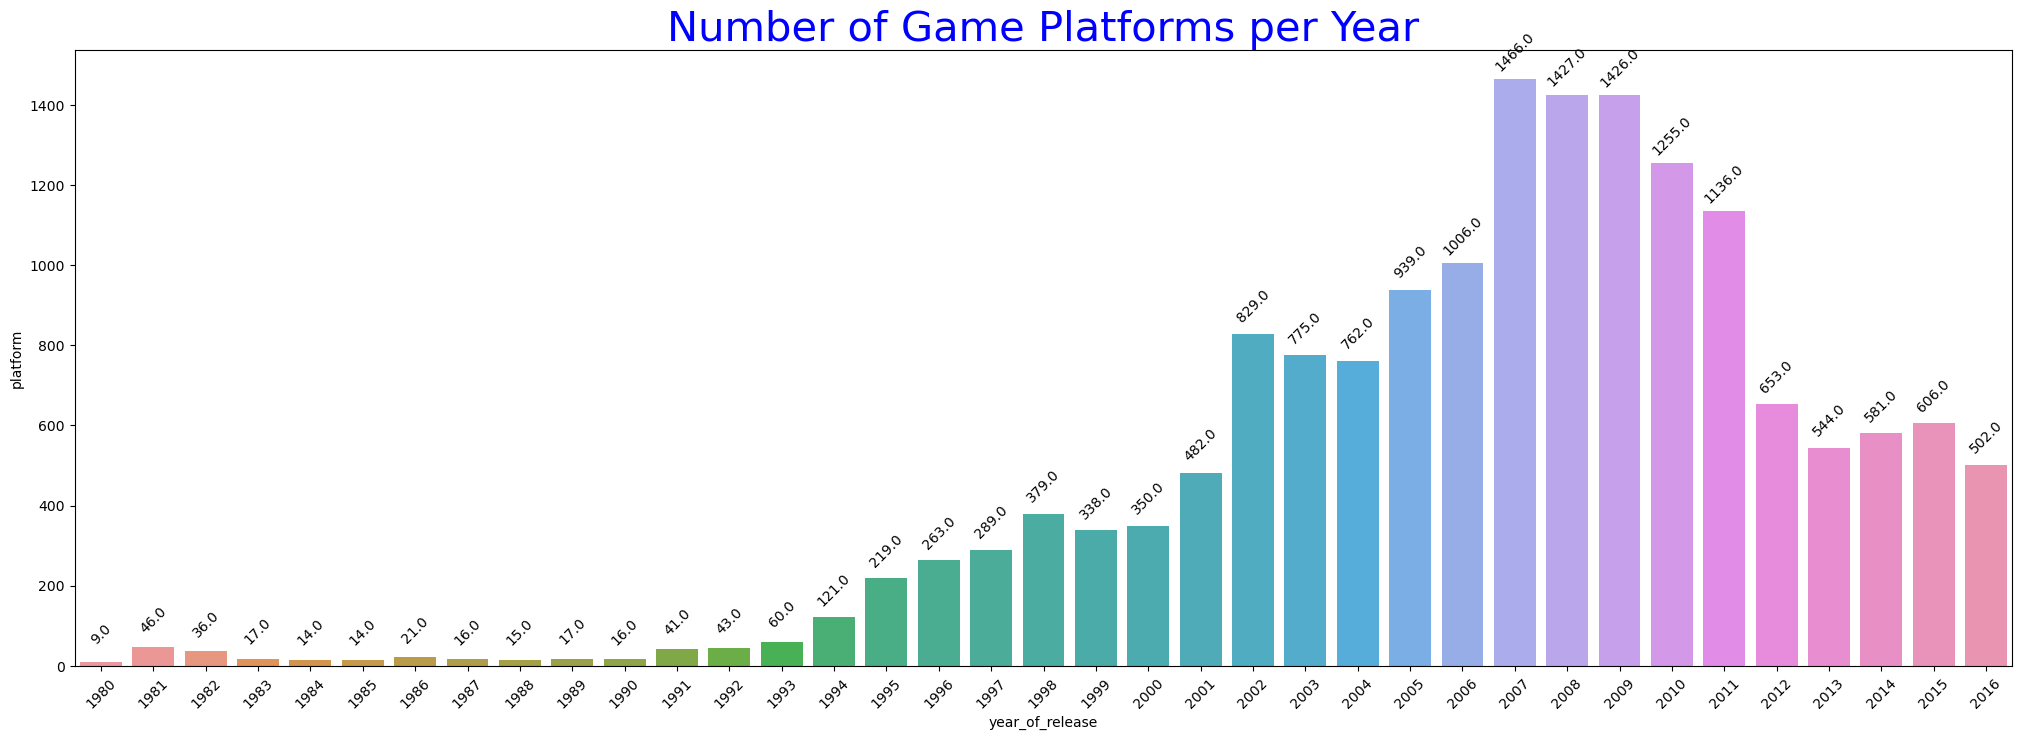

In [73]:
plt.figure(figsize=(25, 8))
plt.title('Number of Game Platforms per Year', fontsize=30, color='blue')
ppy = df.groupby('year_of_release')['platform'].count().reset_index()
#ss.barplot(data=ppy, x='year_of_release', y='platform')
splot = sns.barplot(data=ppy, x='year_of_release', y='platform') # assign plot kedalam object
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', # posisi label value vertical dan horizontal berada pada certer plot
                   xytext = (0, 20), rotation=45, # memutar label value pada plot 45 derajat dan memberi jara 20 pixel dari plot
                   textcoords = 'offset points')
#contoh kode anotasi selesai
plt.xticks(rotation = 45) # memutar label x axis 45 derajat
plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

In 2007, game sales on various platforms were at their maximum.

</div>


## Step 3 Sales per Platform

In [74]:
pd.pivot_table(df, columns='platform', values='year_of_release', aggfunc='count')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,133,3,520,52,2151,98,822,556,27,1,...,173,6,239,2,6,1320,147,1262,824,247


In [102]:

year_after2010=df[(df['year_of_release'] >= 2010)]
numeric_df = year_after2010.select_dtypes(include='number')
year_after2010


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,<NA>,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [95]:
Platform_peryear = pd.pivot_table(year_after2010, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').reset_index()
Platform_peryear['year_of_release'] = Platform_peryear['year_of_release'].astype(str)
Platform_peryear

platform,year_of_release,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2010,NaN,85.02,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN
1,2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2,2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
3,2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
4,2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
5,2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
6,2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


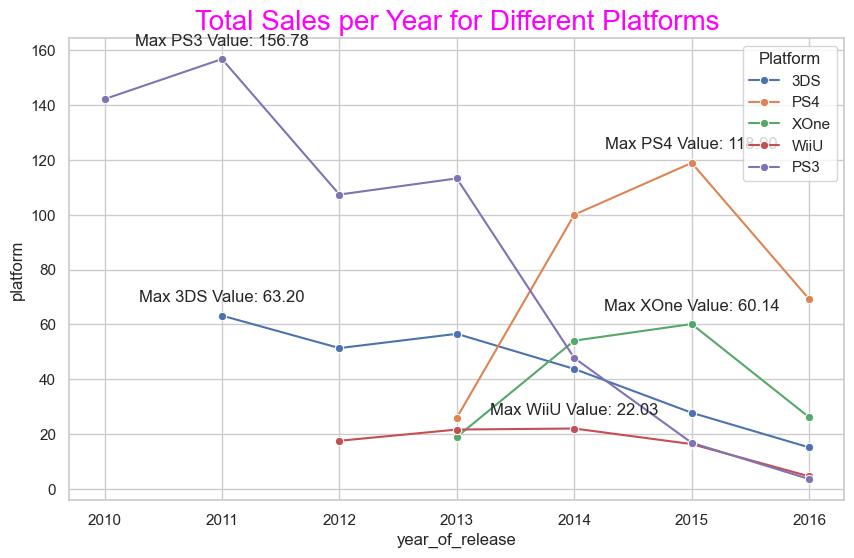

In [178]:
Platform_peryear = pd.pivot_table(year_after2010, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').reset_index()
Platform_peryear['year_of_release'] = Platform_peryear['year_of_release'].astype(str)


# Create a line plot with categorical data on the y-axis
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
# Plot the line
#sns.lineplot(x='year_of_release', y='platform', data=Platform_peryear, marker="o")
sns.lineplot(x='year_of_release', y='3DS', data=Platform_peryear, label='3DS', marker="o")
sns.lineplot(x='year_of_release', y='PS4', data=Platform_peryear, label='PS4', marker="o")
sns.lineplot(x='year_of_release', y='XOne', data=Platform_peryear, label='XOne', marker="o")
sns.lineplot(x='year_of_release', y='WiiU', data=Platform_peryear, label='WiiU', marker="o")
sns.lineplot(x='year_of_release', y='PS3', data=Platform_peryear, label='PS3', marker="o")

plt.title('Total Sales per Year for Different Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform')

# Annotate the peaks of the lines
max_3ds_value = Platform_peryear['3DS'].max()
max_3ds_year = Platform_peryear.loc[Platform_peryear['3DS'].idxmax()]['year_of_release']
plt.annotate(f'Max 3DS Value: {max_3ds_value:.2f}', (max_3ds_year, max_3ds_value), textcoords="offset points", xytext=(0, 10), ha='center')

max_ps4_value = Platform_peryear['PS4'].max()
max_ps4_year = Platform_peryear.loc[Platform_peryear['PS4'].idxmax()]['year_of_release']
plt.annotate(f'Max PS4 Value: {max_ps4_value:.2f}', (max_ps4_year, max_ps4_value), textcoords="offset points", xytext=(0, 10), ha='center')

max_XOne_value = Platform_peryear['XOne'].max()
max_XOne_year = Platform_peryear.loc[Platform_peryear['XOne'].idxmax()]['year_of_release']
plt.annotate(f'Max XOne Value: {max_XOne_value:.2f}', (max_XOne_year, max_XOne_value), textcoords="offset points", xytext=(0, 10), ha='center')

max_WiiU_value = Platform_peryear['WiiU'].max()
max_WiiU_year = Platform_peryear.loc[Platform_peryear['WiiU'].idxmax()]['year_of_release']
plt.annotate(f'Max WiiU Value: {max_WiiU_value:.2f}', (max_WiiU_year, max_WiiU_value), textcoords="offset points", xytext=(0, 10), ha='center')

max_PS3_value = Platform_peryear['PS3'].max()
max_PS3_year = Platform_peryear.loc[Platform_peryear['PS3'].idxmax()]['year_of_release']
plt.annotate(f'Max PS3 Value: {max_PS3_value:.2f}', (max_PS3_year, max_PS3_value), textcoords="offset points", xytext=(0, 10), ha='center')
#(f'Max 3DS Value: {max_3ds_value:.2f}'

# Customize the plot
plt.title('Total Sales per Year for Different Platforms', fontsize=20, color='magenta')
plt.xlabel('year_of_release')
plt.ylabel('platform')

plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

    - In the period 2010 - 2016, the largest platform sales were still from the PS series, namely PS3 158.75 million USD but decreased in 2016.
    - followed by PS4 sales of 118.9 Million USD.
    - In that year, the 3DS, WiiU and XOne platforms appeared, but sales were still below PS3 and PS4

</div>


In [97]:
#Platform_sale=Platform_peryear.loc[:, ['year_of_release','PS3','PS4','X360','Wii','XOne','PSP','WiiU','DS']]
#Platform_sale

In [98]:
sale_baseon_genre = pd.pivot_table(year_after2010, index='year_of_release', columns='genre', values='total_sales', aggfunc='sum').reset_index()
sale_baseon_genre

genre,year_of_release,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2010,115.29,15.96,14.69,95.14,31.04,10.75,34.37,69.65,76.83,21.49,91.24,13.68
1,2011,116.68,15.61,22.41,54.38,27.68,4.96,34.81,52.83,98.18,15.14,56.08,8.82
2,2012,119.25,5.79,9.18,22.22,18.37,1.72,13.61,46.91,71.75,13.36,30.42,3.26
3,2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
4,2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
5,2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
6,2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


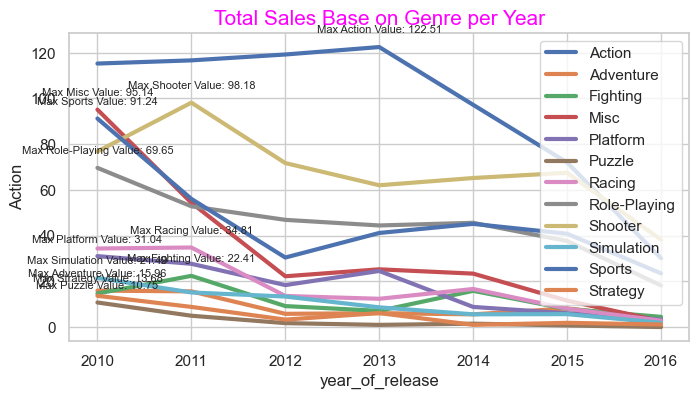

In [177]:
sale_baseon_genre = pd.pivot_table(year_after2010, index='year_of_release', columns='genre', values='total_sales', aggfunc='sum').reset_index()
#sale_baseon_genre
plt.figure(figsize=(8, 4))
plt.title('Total Sales Base on Genre per Year', fontsize=15, color='magenta')


# Iterate through each genre and plot it with annotation
for genre in sale_baseon_genre.columns[1:]:
    sns.lineplot(data=sale_baseon_genre, x="year_of_release", linewidth=3, y=genre, label=genre)
    max_value = sale_baseon_genre[genre].max()
    max_year = sale_baseon_genre.loc[sale_baseon_genre[genre].idxmax()]['year_of_release']
    plt.annotate(f'Max {genre} Value: {max_value:.2f}', (max_year, max_value), textcoords="offset points", xytext=(0, 10), ha='center',fontsize=8)

plt.show()


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

Penjualan game berdasarkan genre:

    -The most popular genres are Action, Max Shooter, Misc, Sport and Role Playing
    
    - Other genres are not as popular

  
</div>


In [81]:
sale_baseon_rating = pd.pivot_table(year_after2010, index='year_of_release', columns='rating', values='total_sales', aggfunc='sum').reset_index()
sale_baseon_rating

#     Keterangan
# AO = Adult Only, Game dewasa, mengandung unsur  kekerasan
# E = Everyone, untuk semua
# E10+ = untuk semua dan anak mulai umur 10 tahnun
# K-A = Kids to adult, anak2 menjelang dewasa
# M = Mature, untuk 17 tahun ke atas
# RP = Rating Pending
# T = Teen, Remaja


rating,year_of_release,E,E10+,EC,M,RP,T
0,2010,186.96,72.17,0.75,134.88,NaN,100.69
1,2011,102.27,75.37,0.45,156.70,0.04,91.09
2,2012,87.01,40.10,NaN,138.43,NaN,36.32
3,2013,67.03,43.71,NaN,145.14,NaN,27.49
4,2014,57.89,35.00,NaN,115.44,NaN,41.40
5,2015,49.50,27.55,NaN,72.75,NaN,33.61
6,2016,25.74,9.13,NaN,38.35,NaN,24.12


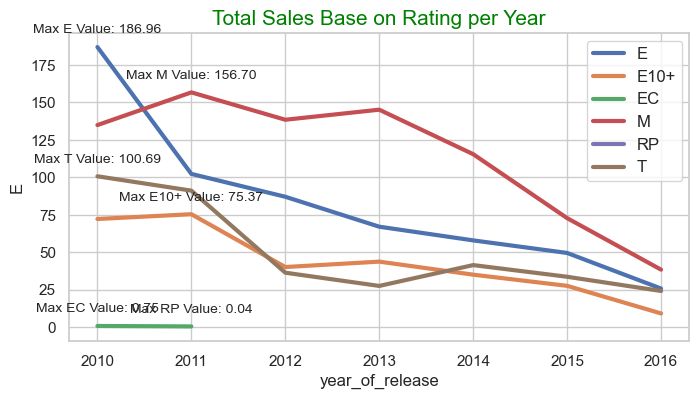

In [171]:
plt.figure(figsize=(8, 4))
plt.title('Total Sales Base on Rating per Year', fontsize=15, color='green')

#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='AO',label='AO')
#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='E',label='E')
#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='E10+',label='E10+')
#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='EC',label='EC')
#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='K-A',label='K-A')
#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='M',label='M')
#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='RP',label='RP')
#sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=7, y='T',label='T')

for rating in sale_baseon_rating.columns[1:]:
    sns.lineplot(data=sale_baseon_rating, x="year_of_release", linewidth=3, y=rating, label=rating)
    max_value = sale_baseon_rating[rating].max()
    max_year = sale_baseon_rating.loc[sale_baseon_rating[rating].idxmax()]['year_of_release']
    plt.annotate(f'Max {rating} Value: {max_value:.2f}', (max_year, max_value), textcoords="offset points", xytext=(0, 10), ha='center',fontsize=10)


plt.legend(loc='upper left')
plt.legend()
legend = plt.legend()
font_size = 12  # You can adjust this value as needed
for text in legend.get_texts():
    text.set_fontsize(font_size)


plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The game ratings that sell the most are Rating Everyone (E) and Mature (Adult).

</div>


## Correlation between Critic_score and Total_sales

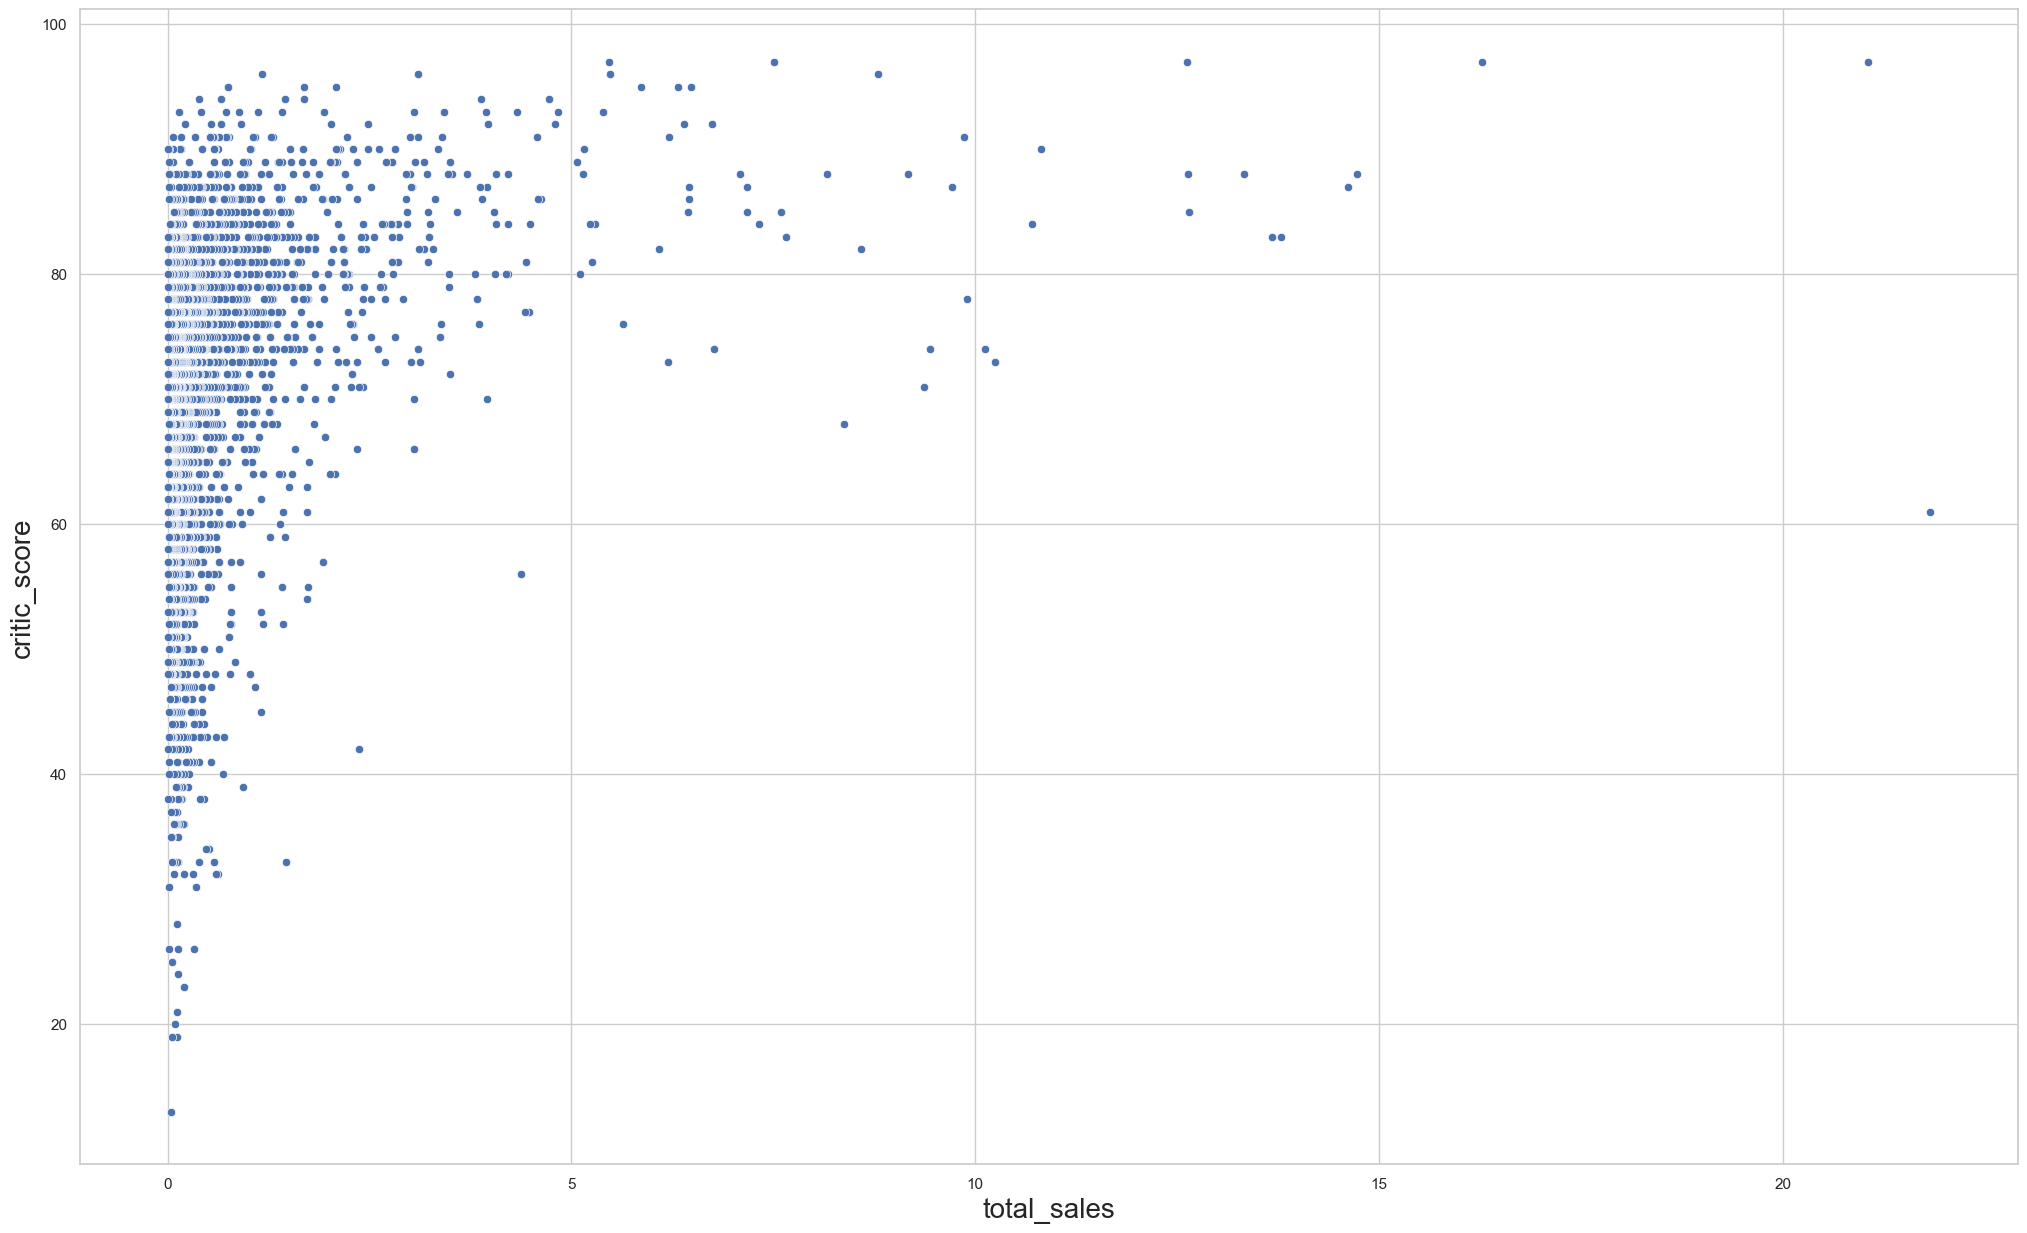

In [83]:
plt.figure(figsize=(25, 15))
plt.xlabel("total_sales", fontdict={'fontsize': 20}) 
plt.ylabel("critic_score", fontdict={'fontsize': 20}) 
sns.scatterplot(data=year_after2010, x='total_sales', y='critic_score')
plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

A high Critic Score does not have much influence on Total Sales.

</div>


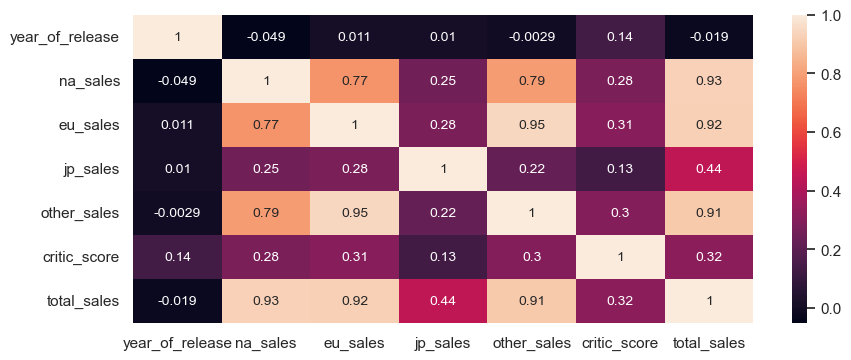

<Figure size 1000x400 with 0 Axes>

In [163]:
correlation = numeric_df.corr()

plt.figure(figsize=(10, 4))
sns.heatmap(correlation, annot=True, annot_kws={"fontsize": 10})
plt.figure(figsize=(10, 4))
plt.show()


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

Critic score slightly influences sales with a rather small correlation, namely 0.28.

</div>




## Sorting game names, platforms and genres based on highest total sales

In [90]:
#Taking total_sales data samples only from 3 million USD and above

year_TI_check=df[(df['year_of_release'] >= 2010) & (df['total_sales'] >= 3.0) ]
year_TI_check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,<NA>,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
463,Heavy Rain,PS3,2010,Adventure,1.29,1.21,0.06,0.47,87,7.7,M,3.03
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87,6.3,E,3.01
471,Far Cry 3,X360,2012,Shooter,1.38,1.32,0.02,0.28,91,8.6,M,3.00
472,Epic Mickey,Wii,2010,Platform,2.04,0.63,0.12,0.22,73,7,E,3.01


In [91]:
#A=year_TI_check.loc[:, 'name':'total_sales'].value_count()
#A
selected_columns = ['year_of_release', 'name', 'total_sales']
sorted_df = year_TI_check[selected_columns].sort_values(by='total_sales', ascending=False)
sorted_df.head(10)

,year_of_release,name,total_sales
14,2010,Kinect Adventures!,21.82
16,2013,Grand Theft Auto V,21.05
23,2013,Grand Theft Auto V,16.27
27,2010,Pokemon Black/Pokemon White,15.13
29,2011,Call of Duty: Modern Warfare 3,14.73
31,2015,Call of Duty: Black Ops 3,14.63
32,2010,Call of Duty: Black Ops,14.62
33,2013,Pokemon X/Pokemon Y,14.60
34,2012,Call of Duty: Black Ops II,13.79
35,2012,Call of Duty: Black Ops II,13.68


In [92]:
selected_columns = ['year_of_release','platform', 'total_sales']
sorted_df = year_TI_check[selected_columns].sort_values(by=['total_sales','platform'], ascending=False)
sorted_df.head(10)

,year_of_release,platform,total_sales
14,2010,X360,21.82
16,2013,PS3,21.05
23,2013,X360,16.27
27,2010,DS,15.13
29,2011,X360,14.73
31,2015,PS4,14.63
32,2010,X360,14.62
33,2013,3DS,14.60
34,2012,PS3,13.79
35,2012,X360,13.68


In [93]:
selected_columns = ['year_of_release','genre', 'total_sales']
sorted_df = year_TI_check[selected_columns].sort_values(by=['total_sales','genre'], ascending=False)
sorted_df.head(10)

,year_of_release,genre,total_sales
14,2010,Misc,21.82
16,2013,Action,21.05
23,2013,Action,16.27
27,2010,Role-Playing,15.13
29,2011,Shooter,14.73
31,2015,Shooter,14.63
32,2010,Shooter,14.62
33,2013,Role-Playing,14.60
34,2012,Shooter,13.79
35,2012,Shooter,13.68


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

In the period 2010 - 2016:
- Platforms with the highest total sales: X360, PS3, PS4. 3DS
- Many popular games are released using platforms: X360, PS4, XOne and PC
- Genres that get the highest total sales: Action, Role=Playing, Shooter, Misc
- Games with the highest total sales: Kinect Adventures!, Grand Theft Auto V, Pokemon Black/Pokemon White, Call of Duty: Modern Warfare 3
</div>


## Boxplot Total_Sales based on Platform

In [87]:
#Sampling data based on platform for boxplots

PS4=df[(df['platform']== 'PS4')]
PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


In [88]:
PS4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,252.0,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,72.09127,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,12.485992,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.0,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,66.0,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,73.0,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,80.0,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.0,14.630000


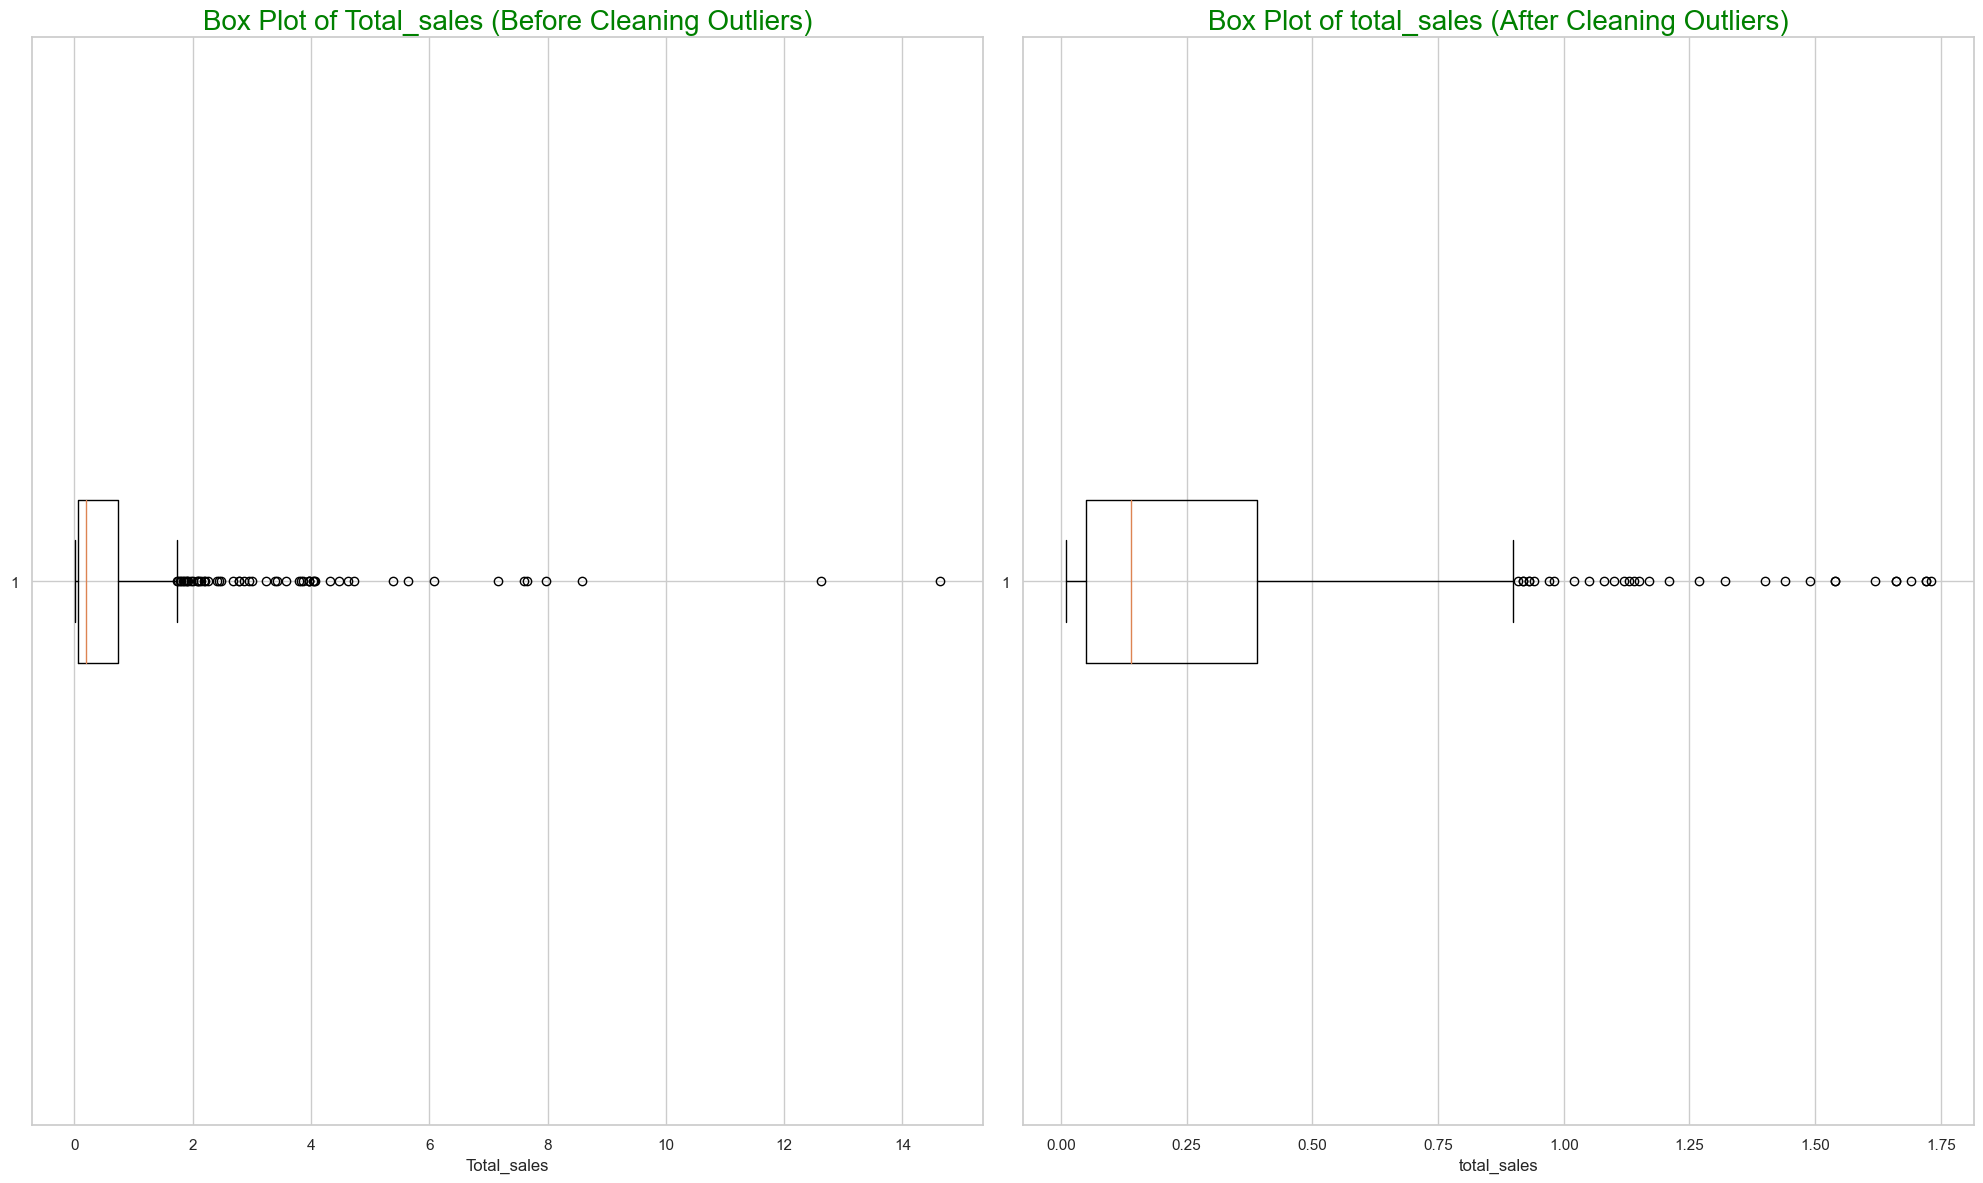

Lower_bound -0.9449999999999998
upper_bound 1.7349999999999999


In [89]:
# Plot the box plot before cleaning outliers
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.boxplot(PS4['total_sales'], vert=False)
plt.title('Box Plot of Total_sales (Before Cleaning Outliers)',fontsize=20, color='green')
plt.xlabel('Total_sales')

# Calculate the Interquartile Range (IQR) and define the upper and lower bounds
Q1 = PS4['total_sales'].quantile(0.25)
Q3 = PS4['total_sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clean the outliers by removing values outside the bounds
df_cleaned = PS4[(PS4['total_sales'] >= lower_bound) & (PS4['total_sales'] <= upper_bound)]

# Plot the box plot after cleaning outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['total_sales'], vert=False)
plt.title('Box Plot of total_sales (After Cleaning Outliers)', fontsize=20, color='green')
plt.xlabel('total_sales')

# Show the plots
plt.tight_layout()
plt.show()

print ('Lower_bound', lower_bound )
print ('upper_bound', upper_bound )

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

Insight: After cleaning out outliers, sales distribution becomes more homogeneous for Platform 
    PS4.
    
    Recommendation: Cleaning outliers can help analyze the data better and 
    avoid distortion of analysis results.
    
</div>


In [105]:
XOne=df[(df['platform']== 'XOne')]
XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,<NA>,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,NaN,0.01


In [106]:
XOne.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.0,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.0,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.0,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.0,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.0,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.0,7.390000


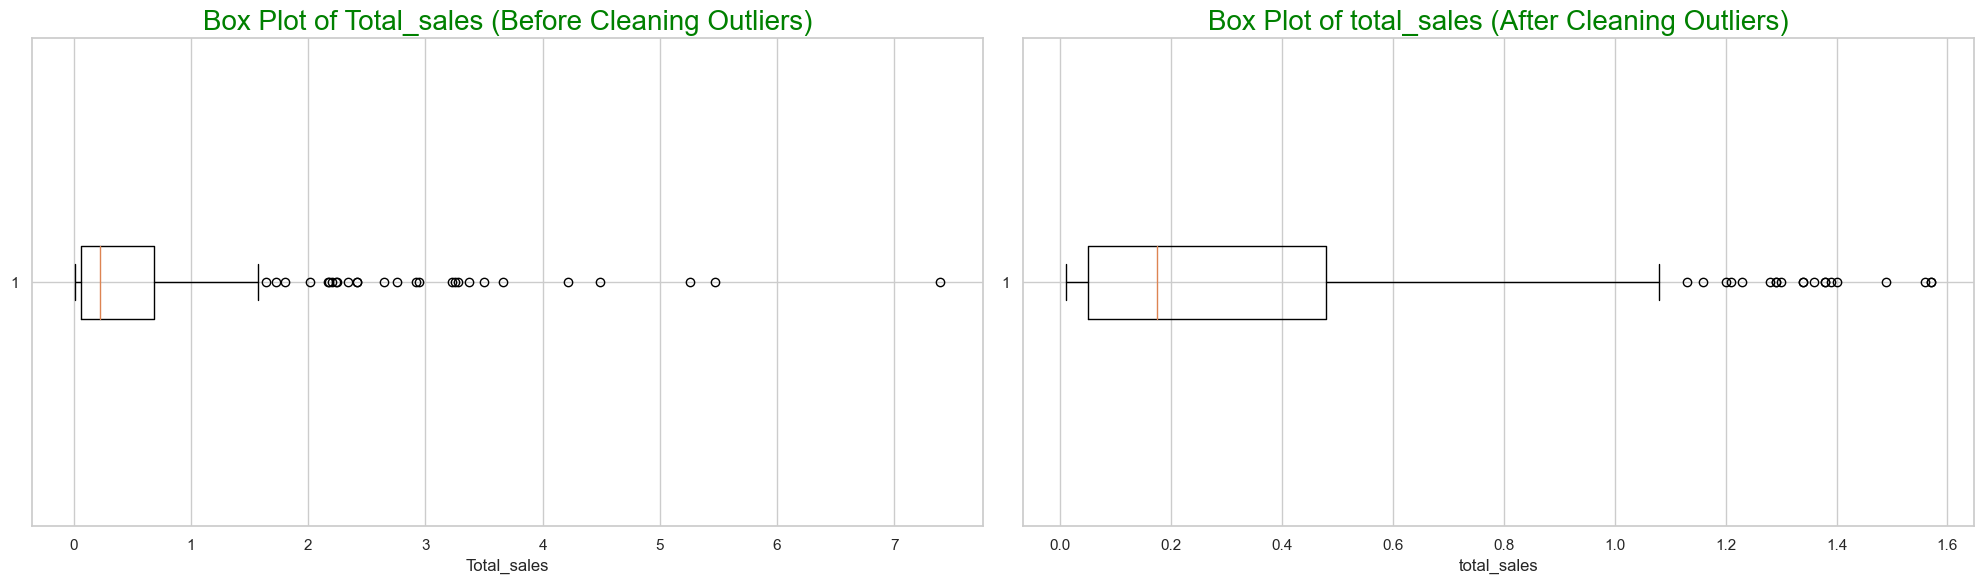

Lower_bound -0.8775
upper_bound 1.6225


In [107]:
# Plot the box plot before cleaning outliers
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.boxplot(XOne['total_sales'], vert=False)
plt.title('Box Plot of Total_sales (Before Cleaning Outliers)', fontsize=20, color='green')
#plt.title('Total Sales Base on Rating per Year', fontsize=30, color='green')
plt.xlabel('Total_sales')

# Calculate the Interquartile Range (IQR) and define the upper and lower bounds
Q1 = XOne['total_sales'].quantile(0.25)
Q3 = XOne['total_sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clean the outliers by removing values outside the bounds
df_cleaned = XOne[(XOne['total_sales'] >= lower_bound) & (XOne['total_sales'] <= upper_bound)]

# Plot the box plot after cleaning outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['total_sales'], vert=False)
plt.title('Box Plot of total_sales (After Cleaning Outliers)', fontsize=20, color='green')
plt.xlabel('total_sales')

# Show the plots
plt.tight_layout()
plt.show()

print ('Lower_bound', lower_bound )
print ('upper_bound', upper_bound )

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

Insight: After cleaning out outliers, sales distribution becomes more homogeneous for XOne Platform.
    
Recommendation: Cleaning outliers can help analyze the data better and
avoid distortion of analysis results.
 

</div>


## Step 4 Comparison of the same game on different platforms

In [108]:
G1=df[(df['name']== 'Call of Duty: Black Ops 3')]
G1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN,7.39
1049,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,<NA>,NaN,NaN,1.70
1062,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,<NA>,NaN,NaN,1.69
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,<NA>,NaN,NaN,0.26


In [109]:
selected_columns = ['year_of_release','platform','genre', 'total_sales']
sorted_G1 = G1[selected_columns].sort_values(by='total_sales', ascending=False)
sorted_G1

,year_of_release,platform,genre,total_sales
31,2015,PS4,Shooter,14.63
99,2015,XOne,Shooter,7.39
1049,2015,X360,Shooter,1.70
1062,2015,PS3,Shooter,1.69
6463,2015,PC,Shooter,0.26


In [110]:
G2=df[(df['name']== 'Grand Theft Auto V')]
G2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96,7.9,M,1.17


In [111]:
selected_columns = ['year_of_release','platform','genre', 'total_sales']
sorted_G2 = G2[selected_columns].sort_values(by='total_sales', ascending=False)
sorted_G2

,year_of_release,platform,genre,total_sales
16,2013,PS3,Action,21.05
23,2013,X360,Action,16.27
42,2014,PS4,Action,12.62
165,2014,XOne,Action,5.47
1730,2015,PC,Action,1.17


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

- The platform that has the highest sales is the PS2 Platform over a period of 12 years (unknown years do not count)
- PS 2 sales experienced peak Total Sales in 2004 amounting to 211.81 Million USD
-Sales experienced a decline starting in 2004, because it had gained competition from other platforms with the release of the Wii, X360, PS3 and PS4 platforms
-The age of the Game Platform ranges from 10 - 12 years
- New Game Platforms appear every 2 - 4 years
- Data collection period starts in 2010
- Platforms with the highest total sales: X360, PS3, PS4. 3DS
- Many popular games are released using platforms: X360, PS4, XOne and PC
- Genres that get the highest total sales: Action, Role=Playing, Shooter, Misc
- Games with the highest total sales: Kinect Adventures!, Grand Theft Auto V, Pokemon Black/Pokemon White, Call of Duty: Modern Warfare 3
</div>

<div class="alert alert-info">
<b>Insight</b> <a class="tocSkip"></a>

- Game Platform age ranges from 10 - 12 years
- New Game Platforms appear every 2 - 4 years
</div>

<div class="alert alert-info">
<b>Recommendation for 2017 :</b> <a class="tocSkip"></a>

- Preparing for the emergence of new platforms from the series: PS4, X360, XOne

- Buy game variations, or series continuation games from Grand theft Auto, Pokemon, Call of Duty
- Buy the same game on a variety of platforms: PS4, X360, XOne and PC
- Buy games with the Action, RPG and Shooter genres
</div>

# Step 5  User Stage for Each Region

## Search for top Platforms and Genres in North America, Europe and Japan

In [112]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


In [113]:
selected_columns = ['platform', 'na_sales']
sorted_na_df = year_TI_check[selected_columns].sort_values(by=['na_sales','platform'], ascending=False)
sorted_na_df.head(20)

,platform,na_sales
14,X360,15.00
32,X360,9.70
23,X360,9.66
29,X360,9.04
35,X360,8.25
64,X360,7.04
16,PS3,7.02
60,X360,6.73
66,X360,6.65
31,PS4,6.03


In [114]:
selected_columns = ['platform', 'eu_sales']
sorted_eu_df = year_TI_check[selected_columns].sort_values(by=['eu_sales','platform'], ascending=False)
sorted_eu_df.head(20)

,platform,eu_sales
16,PS3,9.09
42,PS4,6.31
77,PS4,6.12
31,PS4,5.86
94,PS4,5.75
34,PS3,5.73
37,PS3,5.73
23,X360,5.14
81,PS3,5.01
14,X360,4.89


In [115]:
selected_columns = ['platform', 'na_sales']
sorted_jp_df = year_TI_check[selected_columns].sort_values(by=['na_sales','platform'], ascending=False)
sorted_jp_df.head(20)

,platform,na_sales
14,X360,15.00
32,X360,9.70
23,X360,9.66
29,X360,9.04
35,X360,8.25
64,X360,7.04
16,PS3,7.02
60,X360,6.73
66,X360,6.65
31,PS4,6.03


In [116]:
selected_columns = ['genre', 'na_sales']
sorted_nagenre_df = year_TI_check[selected_columns].sort_values(by=['na_sales','genre'], ascending=False)
sorted_nagenre_df.head(20)

,genre,na_sales
14,Misc,15.00
32,Shooter,9.70
23,Action,9.66
29,Shooter,9.04
35,Shooter,8.25
64,Shooter,7.04
16,Action,7.02
60,Shooter,6.73
66,Shooter,6.65
31,Shooter,6.03


In [117]:
selected_columns = ['genre', 'eu_sales']
sorted_eug_df = year_TI_check[selected_columns].sort_values(by=['eu_sales','genre'], ascending=False)
sorted_eug_df.head(20)

,genre,eu_sales
16,Action,9.09
42,Action,6.31
77,Sports,6.12
31,Shooter,5.86
94,Sports,5.75
34,Shooter,5.73
37,Shooter,5.73
23,Action,5.14
81,Action,5.01
14,Misc,4.89


In [118]:
selected_columns = ['genre', 'jp_sales']
sorted_jp_df = year_TI_check[selected_columns].sort_values(by=['jp_sales','genre'], ascending=False)
sorted_jp_df.head(20)

,genre,jp_sales
27,Role-Playing,5.65
215,Role-Playing,4.87
73,Simulation,4.39
33,Role-Playing,4.35
385,Role-Playing,3.44
412,Role-Playing,3.18
83,Role-Playing,3.14
47,Role-Playing,3.10
406,Action,2.79
40,Racing,2.69


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

- Game sales in North America mostly use the platform: X360. PS3, PS4, Wii
- Game sales in Europe mostly use platforms: PS3, PS4, X360. 3DS
- Game sales in Japan mostly use the platform: X360. PS3, PS4, 3DS, Wii
- Game genres in North America that are more popular: Misc, Shooter, Action. RPGs .
- Game genres in Europe are more popular: Action, Shooter, Sport, Racing
- Game genres in Japan are more popular: RPG, Simulation, Action, Racing, Misc.

</div>


## Ratings per Region

In [119]:
# Rating Game di North Amerika

nasale_baseon_rating = pd.pivot_table(year_TI_check, index='year_of_release', columns='rating', values='na_sales', aggfunc='sum').reset_index()
nasale_baseon_rating

#     Keterangan
# AO = Adult Only, Game dewasa, mengandung unsur  kekerasan
# E = Everyone, untuk semua
# E10+ = untuk semua dan anak mulai umur 10 tahnun
# K-A = Kids to adult, anak2 menjelang dewasa
# M = Mature, untuk 17 tahun ke atas
# RP = Rating Pending
# T = Teen, Remaja

rating,year_of_release,E,E10+,M,T
0,2010,33.25,14.49,47.96,4.72
1,2011,13.83,7.98,39.63,8.47
2,2012,13.80,6.57,35.07,NaN
3,2013,8.34,1.88,39.73,NaN
4,2014,4.53,NaN,25.03,6.31
5,2015,6.04,4.03,12.10,4.85
6,2016,0.66,NaN,4.06,1.85


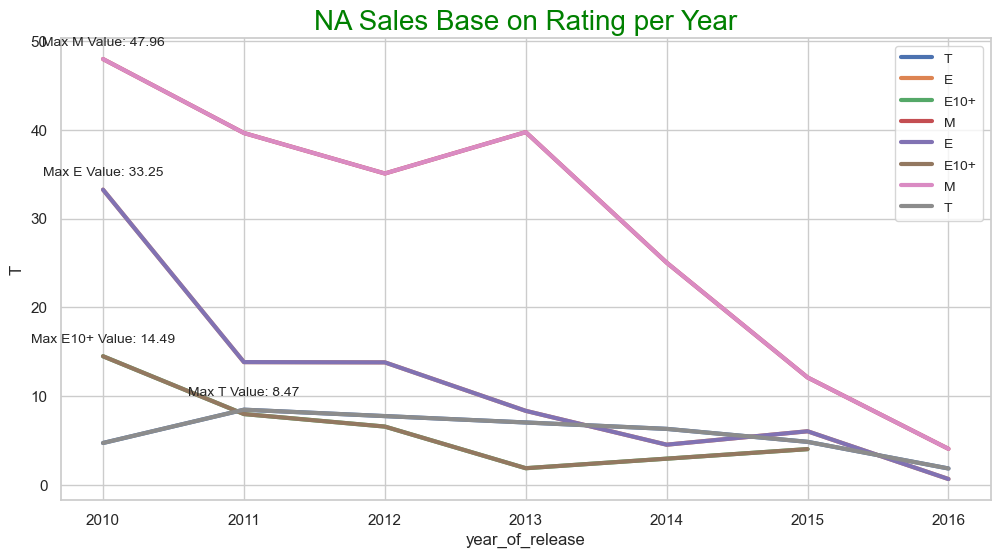

In [161]:
plt.figure(figsize=(12, 6))
plt.title('NA Sales Base on Rating per Year', fontsize=20, color='green')


#sns.lineplot(data=nasale_baseon_rating, linewidth=7 )
sns.lineplot(data=nasale_baseon_rating, x="year_of_release", linewidth=3, y='T',label='T')
sns.lineplot(data=nasale_baseon_rating, x="year_of_release", linewidth=3, y='E',label='E')
sns.lineplot(data=nasale_baseon_rating, x="year_of_release", linewidth=3, y='E10+',label='E10+')
#sns.lineplot(data=nasale_baseon_rating, x="year_of_release", linewidth=7, y='EC',label='EC')
sns.lineplot(data=nasale_baseon_rating, x="year_of_release", linewidth=3, y='M',label='M')
#sns.lineplot(data=nasale_baseon_rating, x="year_of_release", linewidth=3, y='RP',label='RP')

for rating in nasale_baseon_rating.columns[1:]:
    sns.lineplot(data=nasale_baseon_rating, x="year_of_release", linewidth=3, y=rating, label=rating)
    max_value = nasale_baseon_rating[rating].max()
    max_year = nasale_baseon_rating.loc[nasale_baseon_rating[rating].idxmax()]['year_of_release']
    plt.annotate(f'Max {rating} Value: {max_value:.2f}', (max_year, max_value), textcoords="offset points", xytext=(0, 10), ha='center',fontsize=10)



plt.legend(loc='upper left')
plt.legend()
legend = plt.legend()
font_size = 10  # You can adjust this value as needed
for text in legend.get_texts():
    text.set_fontsize(font_size)


plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>


The rating that is most popular is M then E

</div>



In [121]:
# Rating Game di Europe

eusale_baseon_rating = pd.pivot_table(year_TI_check, index='year_of_release', columns='rating', values='eu_sales', aggfunc='sum').reset_index()
eusale_baseon_rating

#     Keterangan
# AO = Adult Only, Game dewasa, mengandung unsur  kekerasan
# E = Everyone, untuk semua
# E10+ = untuk semua dan anak mulai umur 10 tahnun
# K-A = Kids to adult, anak2 menjelang dewasa
# M = Mature, untuk 17 tahun ke atas
# RP = Rating Pending
# T = Teen, Remaja

rating,year_of_release,E,E10+,M,T
0,2010,26.21,7.03,22.36,2.44
1,2011,10.04,4.27,28.84,5.87
2,2012,16.61,3.27,24.30,NaN
3,2013,14.21,1.39,30.80,NaN
4,2014,9.50,NaN,24.62,5.29
5,2015,10.45,1.84,12.09,2.98
6,2016,5.75,NaN,5.85,2.50


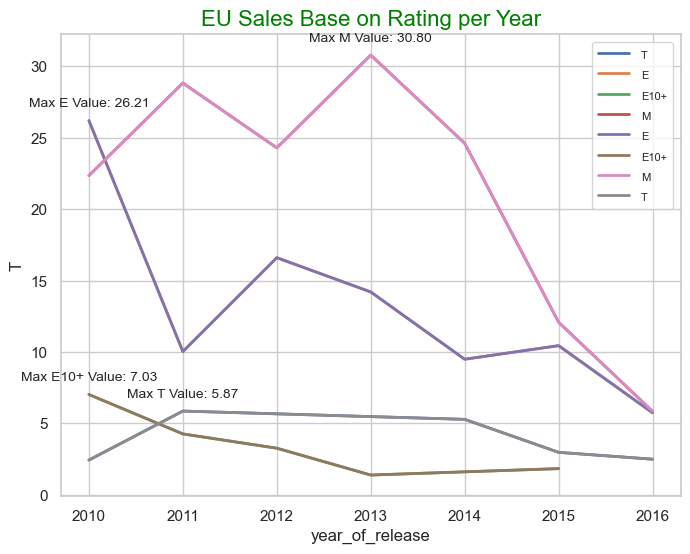

In [158]:
plt.figure(figsize=(8,6))
plt.title('EU Sales Base on Rating per Year', fontsize=16, color='green')


#sns.lineplot(data=nasale_baseon_rating, linewidth=7 )
sns.lineplot(data=eusale_baseon_rating, x="year_of_release", linewidth=2, y='T',label='T')
sns.lineplot(data=eusale_baseon_rating, x="year_of_release", linewidth=2, y='E',label='E')
sns.lineplot(data=eusale_baseon_rating, x="year_of_release", linewidth=2, y='E10+',label='E10+')
# sns.lineplot(data=eusale_baseon_rating, x="year_of_release", linewidth=2, y='EC',label='EC')
sns.lineplot(data=eusale_baseon_rating, x="year_of_release", linewidth=2, y='M',label='M')
#sns.lineplot(data=eusale_baseon_rating, x="year_of_release", linewidth=2, y='RP',label='RP')
for rating in eusale_baseon_rating.columns[1:]:
    sns.lineplot(data=eusale_baseon_rating, x="year_of_release", linewidth=2, y=rating, label=rating)
    max_value = eusale_baseon_rating[rating].max()
    max_year = eusale_baseon_rating.loc[eusale_baseon_rating[rating].idxmax()]['year_of_release']
    plt.annotate(f'Max {rating} Value: {max_value:.2f}', (max_year, max_value), textcoords="offset points", xytext=(0, 10), ha='center',fontsize=10)

plt.legend(loc='upper left')
plt.legend()
legend = plt.legend()
font_size = 8  # You can adjust this value as needed
for text in legend.get_texts():
    text.set_fontsize(font_size)

plt.savefig("EU Sales Base on Rating per Year.png", dpi=300, bbox_inches='tight')
plt.show()

<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The rating that is most popular is M then E
   

</div>

In [123]:
# Rating Game di Japan

jpsale_baseon_rating = pd.pivot_table(year_TI_check, index='year_of_release', columns='rating', values='jp_sales', aggfunc='sum').reset_index()
jpsale_baseon_rating

#     Keterangan
# AO = Adult Only, Game dewasa, mengandung unsur  kekerasan
# E = Everyone, untuk semua
# E10+ = untuk semua dan anak mulai umur 10 tahnun
# K-A = Kids to adult, anak2 menjelang dewasa
# M = Mature, untuk 17 tahun ke atas
# RP = Rating Pending
# T = Teen, Remaja

rating,year_of_release,E,E10+,M,T
0,2010,5.75,0.15,1.40,0.01
1,2011,4.95,0.37,1.71,0.34
2,2012,9.06,0.46,2.02,NaN
3,2013,2.89,0.00,2.39,NaN
4,2014,1.37,NaN,1.04,2.78
5,2015,2.40,1.49,1.14,0.11
6,2016,0.08,NaN,0.51,0.19


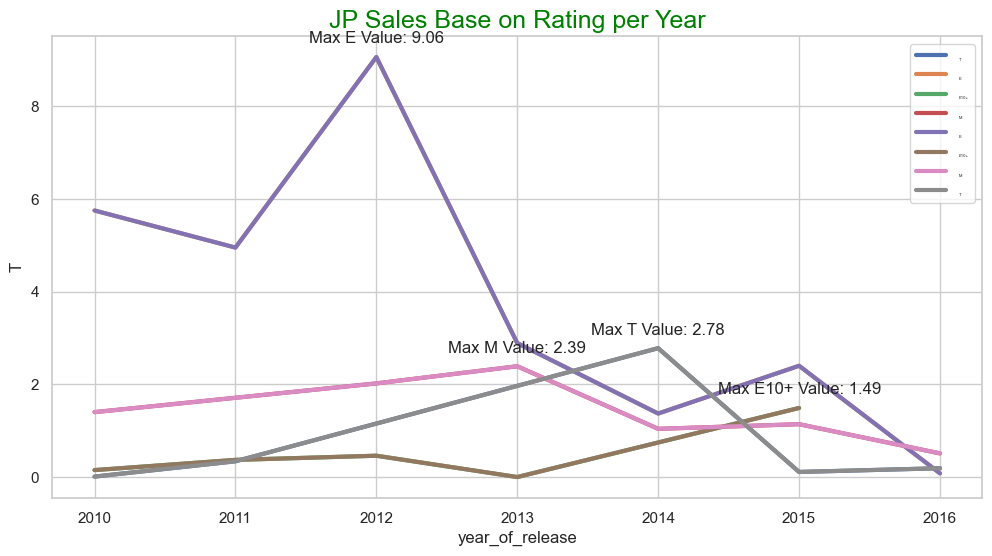

In [141]:
plt.figure(figsize=(12, 6))
plt.title('JP Sales Base on Rating per Year', fontsize=18, color='green')


#sns.lineplot(data=nasale_baseon_rating, linewidth=7 )
sns.lineplot(data=jpsale_baseon_rating, x="year_of_release", linewidth=3, y='T',label='T')
sns.lineplot(data=jpsale_baseon_rating, x="year_of_release", linewidth=3, y='E',label='E')
sns.lineplot(data=jpsale_baseon_rating, x="year_of_release", linewidth=3, y='E10+',label='E10+')
#sns.lineplot(data=jpsale_baseon_rating, x="year_of_release", linewidth=7, y='EC',label='EC')
sns.lineplot(data=jpsale_baseon_rating, x="year_of_release", linewidth=3, y='M',label='M')
#sns.lineplot(data=jpsale_baseon_rating, x="year_of_release", linewidth=7, y='RP',label='RP')
for rating in jpsale_baseon_rating.columns[1:]:
    if rating != 'unknown':  # Menghindari menggambar grafik "unknown"
        sns.lineplot(data=jpsale_baseon_rating, x="year_of_release", linewidth=3, y=rating, label=rating)
        max_value = jpsale_baseon_rating[rating].max()
        max_year = jpsale_baseon_rating.loc[jpsale_baseon_rating[rating].idxmax()]['year_of_release']
        plt.annotate(f'Max {rating} Value: {max_value:.2f}', (max_year, max_value), textcoords="offset points", xytext=(0, 10), ha='center',fontsize=12)
 
plt.legend(loc='upper left')
plt.legend()
legend = plt.legend()
font_size = 3  # You can adjust this value as needed
for text in legend.get_texts():
    text.set_fontsize(font_size)


    
plt.show()

## Finding

- Ratings influence sales in the region
- In NA and EU Regions: Lots of games sold with M Rating
- In the JP Region: Lots of game sales with Rating E


## Step 6.  hipotheses test


In [125]:
# distribusi rata2 pendapatan user di setiap paket
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24


In [126]:
# Persiapkan dataset
avg_user = pd.pivot_table(df, index='name', columns='platform', values='total_sales', aggfunc='mean').reset_index()
avg_user.head(3)

platform,name,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,Beyblade Burst,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fire Emblem Fates,NaN,NaN,1.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Frozen: Olaf's Quest,NaN,NaN,0.59,NaN,0.51,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
avg_XOne = avg_user.loc[:, ['name', 'XOne']].dropna()
avg_XOne.head(5)

platform,name,XOne
82,7 Days to Die,0.05
182,Adventure Time: Finn & Jake Investigations,0.05
200,Agatha Christie's The ABC Murders,0.01
272,Alien: Isolation,0.50
349,Angry Birds Star Wars,0.17


In [128]:
avg_PC = avg_user.loc[:, ['name', 'PC']].dropna()
avg_PC.head(5)

platform,name,PC
17,007: Quantum of Solace,0.02
37,15 Days,0.01
38,1701 A.D.,0.29
40,18 Wheels of Steel: Extreme Trucker,0.02
41,18 Wheels of Steel: Extreme Trucker 2,0.11


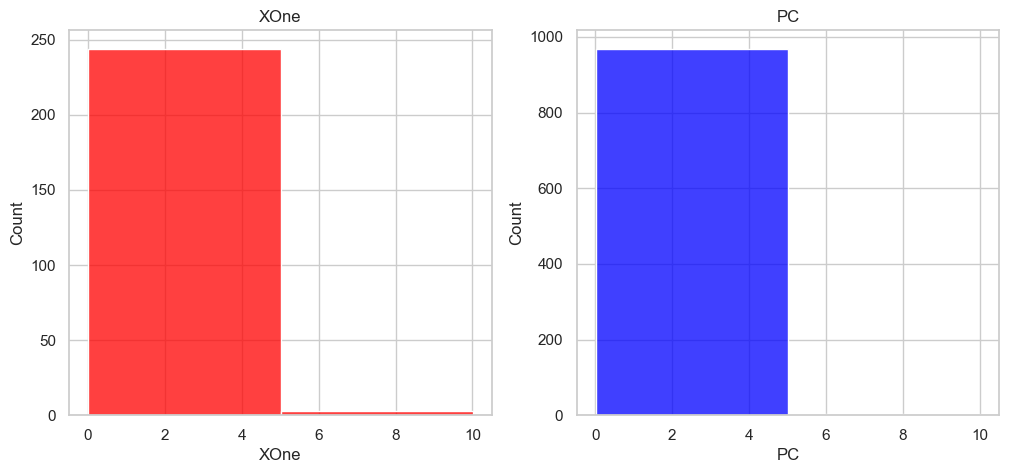

In [129]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('XOne')
sns.histplot(avg_XOne['XOne'], binwidth=5, color='red')

plt.subplot(1, 2, 2)
plt.title('PC')
sns.histplot(avg_PC['PC'], binwidth=5, color='blue')
plt.show()

In [130]:
# Varians dan Standar deviasi
# XOne
XOne_std = round(avg_XOne['XOne'].std(), 1)
XOne_var = round(avg_XOne['XOne'].var(), 1)
print('XOne:')
print(f'Standar Deviasinya {XOne_std}')
print(f'Varians nya {XOne_var}')
print()
PC_std = round(avg_PC['PC'].std(), 1)
PC_var = round(avg_PC['PC'].var(), 1)
# ultimate
print('PC:')
print(f'Standar Deviasinya {PC_std}')
print(f'Varians nya {PC_var}')

XOne:
Standar Deviasinya 1.0
Varians nya 1.1

PC:
Standar Deviasinya 0.7
Varians nya 0.5


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The results obtained are the results of calculating the standard deviation and variance from two groups of data, namely the data group for the XOne platform and the data group for the PC platform.

For XOne platforms:

Standard Deviation (standard deviation) is around 1.0. Standard deviation measures the spread of data from the average. The higher the standard deviation, the greater the spread of the data from the mean. In this case, a standard deviation of around 1.0 indicates that game sales for the XOne platform have a fairly consistent distribution, with little variation from the mean.
The variance is approximately 1.1. Variance is the square of the standard deviation and measures how much variation or spread the data has from the average value. A variance of around 1.1 indicates a low level of variation in game sales for the XOne platform.

For PC platforms:

Standard Deviation is around 0.7. A lower standard deviation than the XOne indicates that game sales for the PC platform have a lower or more consistent spread compared to the XOne. In other words, PC game sales tend to be more stable.
The variance is about 0.5. The lower variance also indicates that game sales for the PC platform have lower variance and tend to be more stable compared to XOne.
In other words, standard deviation and variance are used to measure the spread or variation of data from the average value. In this case, the XOne has a higher standard deviation and variance, indicating greater variation in game sales compared to the PC which has a lower standard deviation and variance, indicating more stable sales.
</div>


## Check the hypothesis that the average user rating of the Xbox One and PC platforms is the same.

In [131]:
Rating_avg = pd.pivot_table(df, index='rating', columns='platform', values='total_sales', aggfunc='mean').reset_index()
Rating_avg

platform,rating,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
0,AO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.960000,NaN
1,E,0.908804,0.446667,0.495719,0.414883,0.430043,0.168623,0.785862,0.731906,0.815403,0.992037,0.294681,0.275909,1.022227,0.988857,0.733239,0.302702,0.605333
2,E10+,0.351842,NaN,0.371969,0.230000,0.288387,0.136974,NaN,0.483920,0.507786,0.549500,0.425377,0.178214,0.672893,0.580952,0.575536,0.176774,0.463548
3,EC,NaN,NaN,0.325000,NaN,0.110000,0.045000,NaN,0.240000,NaN,NaN,NaN,NaN,0.330000,NaN,NaN,NaN,NaN
4,K-A,NaN,NaN,NaN,NaN,NaN,1.205000,1.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M,0.343333,0.050000,0.255000,0.071429,0.182368,0.315000,1.377000,0.927578,1.424566,1.656711,0.645102,0.303333,0.427273,0.272667,1.493673,0.413292,1.081429
6,RP,NaN,NaN,NaN,NaN,NaN,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,T,0.382292,0.316000,0.221508,0.140937,0.345030,0.304141,1.628732,0.672934,0.667917,0.523294,0.412836,0.203824,0.530946,0.346923,0.563499,0.290651,0.418750


In [132]:
alpha = 0.05
p_value = ttest_ind(Rating_avg['XOne'], Rating_avg['PC'], nan_policy='omit').pvalue
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata Rating dari pengguna Platform XOne dan PC surf SAMA')
else:
    print('H0 Diterima: Rata-rata Rating dari pengguna Platform XOne dan PC surf BEDA')
print('Rata2 Rating Pengguna di XOne', Rating_avg['XOne'].mean())
print('Rata2 Rating Pengguna di PC', Rating_avg['PC'].mean())

P-Value: 0.19880707114220625
H0 Diterima: Rata-rata Rating dari pengguna Platform XOne dan PC surf SAMA
Rata2 Rating Pengguna di XOne 0.6422650729646697
Rata2 Rating Pengguna di PC 0.3149626123939625


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

(User Score) between the XOne and PC platforms shows the following results:

P-Value: 0.17216432747566993

P-Value (p value) is a measure used to test the null hypothesis (H0), which states that there is no significant difference between the average user ratings on the XOne and PC platforms. The p value obtained was 0.17216432747566993.
Hypothesis Decision (H0):

Based on the p value obtained, because the p value is greater than alpha (α), namely 0.05, we do not have enough statistical evidence to reject the null hypothesis (H0). This means that we cannot conclude that there is a significant difference in the average user rating between the XOne and PC platforms.
    
Average User Rating:

The average user rating on the XOne platform is around 0.597.
The average user rating on the PC platform is around 0.308.
Based on the above results, we can conclude that based on statistical analysis, there is not enough evidence to support a significant difference in average user ratings between the XOne and PC platforms. However, keep in mind that this is the result of a statistical analysis, and other factors such as user preferences or the types of games available on each platform may also influence user ratings.

</div>


## Check the hypothesis. The average user rating for the Action and Sports genres is different


In [133]:
Ratgen_avg = pd.pivot_table(df, index='rating', columns='genre', values='total_sales', aggfunc='mean').reset_index()
Ratgen_avg

genre,rating,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,AO,1.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E,0.476755,0.358457,0.132500,0.633020,0.920978,0.304325,0.632051,0.839881,0.088750,0.493508,0.711608,0.296714
2,E10+,0.455073,0.172500,0.241579,0.689820,0.420972,0.519302,0.584688,0.455045,0.357586,0.453958,0.502150,0.247949
3,EC,0.450000,0.175000,NaN,0.190000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K-A,NaN,NaN,NaN,1.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.205000
5,M,0.989638,0.425960,0.588980,0.267692,0.530000,NaN,0.276667,0.950494,1.108690,0.268000,0.244375,0.214800
6,RP,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,NaN,NaN,NaN,0.040000
7,T,0.489589,0.167478,0.625635,0.542176,0.370156,0.252000,0.561628,0.570143,0.575862,0.490842,0.478838,0.209136


In [134]:
alpha = 0.05
p_value = ttest_ind(Ratgen_avg['Action'], Ratgen_avg['Sports'], nan_policy='omit').pvalue
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Rata-rata Rating dari pengguna Genre Action dan PC Sports SAMA')
else:
    print('H0 Diterima: Rata-rata Rating dari pengguna Genre Action dan PC Sports BEDA')
print('Rata2 Rating pengguna di genre Action', Ratgen_avg['Action'].mean())
print('Rata2 Rating pengguna di genre Sports', Ratgen_avg['Sports'].mean())

P-Value: 0.343821714161079
H0 Diterima: Rata-rata Rating dari pengguna Genre Action dan PC Sports SAMA
Rata2 Rating pengguna di genre Action 0.8035090951001788
Rata2 Rating pengguna di genre Sports 0.4842426651641021


<div class="alert alert-info">
<b>Finding</b> <a class="tocSkip"></a>

The results of the hypothesis test show a p-value of around 0.343, which is greater than the significance level (alpha) of 0.05. This means we do not have enough statistical evidence to reject the null hypothesis (H0), which states that the average user ratings for the "Action" and "Sports" genres on the PC platform are the same.

From the results of the average user ratings, it can be seen that the average rating for the "Action" genre (around 0.736) is higher than the average rating for the "Sports" genre (around 0.467), although the difference is not statistically significant.
</div>


## Step 7. CONCLUSION

<div class="alert alert-info">
<b>General Conclusion</b> <a class="tocSkip"></a>

   Each row in the table contains game sales data up to 2016, a number of columns give us information about the name of the game, game platform, year of sale, total revenue in several regions, rating, genre and critical scores held by users and game critics.
    The data is sufficient to carry out a hypothesis test, for this reason it is necessary to make corrections for some missing values.
    
Before processing, data processing is carried out first:
The entire data consists of 16715 rows and 11 columns, there is missing data in the columns: Name, Year of Release, Genre, Critic_Score, User_Score, Rating
    The data processing carried out is: Changing the uppercase letters in all columns to 
    lowercase, changes year_of_release from object to datetime, fills in missing values 
    (median data and data that is not significant is deleted).    

In data analysis it was found:

- The platform that has the highest sales is the PS2 Platform in 12 years 
-The age of the Game Platform ranges from 10 - 12 years
- New Game Platforms appear every 2 - 4 years
- Platforms with the highest total sales: X360, PS3, PS4. 3DS
- Many popular games are released using platforms: X360, PS4, XOne and PC
- Genres that get the highest total sales: Action, Role=Playing, Shooter, Misc
- Games with the highest total sales: Kinect Adventures!, Grand Theft Auto V, Pokemon Black/Pokemon White, Call of Duty: Modern Warfare 3
- Ratings influence sales in the region
- Critic score slightly influences sales with a rather small correlation, namely 0.28
</div>